In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon
from geopandas.datasets import naturalearth_cities, naturalearth_lowres
import pycountry
import pycountry_convert as pc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_wine
from sklearn.cluster import DBSCAN

%matplotlib inline

In [6]:
kenya = gpd.read_file('../geographic_data/KenyapolygonKenyapolygon0856/')

In [5]:
guardian = gpd.read_file('../language_data/guardian_language_shp/')

In [18]:
wals = gpd.read_file('../language_data/wals_full_language.csv')

In [19]:
for i in wals.index:
    wals['geometry'][i] = tuple((float(wals.longitude[i]), float(wals.latitude[i])))
wals['geometry'] = wals['geometry'].apply(Point)

In [20]:
wals.head()

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives,geometry
0,aab,,,Arapesh (Abu),-3.45,142.95,Kombio-Arapesh,Torricelli,,PG,...,,,,,,,,,,POINT (142.95 -3.45)
1,aar,aiw,aari1239,Aari,6.0,36.5833333333,South Omotic,Afro-Asiatic,Africa,ET,...,,,,,,,,,,POINT (36.5833333333 6)
2,aba,aau,abau1245,Abau,-4.0,141.25,Upper Sepik,Sepik,Papunesia,PG,...,,,,,,,,,,POINT (141.25 -4)
3,abb,shu,chad1249,Arabic (Chadian),13.8333333333,20.8333333333,Semitic,Afro-Asiatic,Africa,TD,...,,,,,,,,,,POINT (20.8333333333 13.8333333333)
4,abd,abi,abid1235,Abidji,5.66666666667,-4.58333333333,Kwa,Niger-Congo,Africa,CI,...,,,,,,,,,,POINT (-4.58333333333 5.66666666667)


In [34]:
guardian.rename(columns={'ISO639-3 c':'iso_code'},inplace=True)

In [35]:
guardian[guardian['Countries'] == 'Kenya']

,ID,Name in En,Countries,Country co,iso_code,Degree of,Alternate,Number of,Sources,Latitude,Longitude,Descriptio,geometry
615,91,Burji,Kenya,KEN,bji,Vulnerable,None,7000,Ethnologue,2.1857,37.9248,None,POINT (37.9248 2.1857)
836,99,Boni,Kenya,KEN,bob,Definitely endangered,"Aweera, Waata, Sanye\n\n",3000,Bernd Heine,-0.8294,40.8142,Somalia-Kenyan border area.,POINT (40.8142 -0.8294)
1152,95,Bong'om,Kenya,KEN,spy,Definitely endangered,None,1000,None,1.1315,35.0134,Near the Ugandan-Kenyan border.,POINT (35.0134 1.1315)
1458,101,Dahalo,Kenya,KEN,dal,Severely endangered,None,400,"Mauro Tosco, Ed Elderkin",-2.2625,40.7537,Near of the mouth of the Tana river.,POINT (40.7537 -2.2625)
1653,102,Ongamo,Kenya,KEN,nsg,Critically endangered,Nagza,200,Christoph Winter,-2.932,37.4853,"Along the Tanzanian-Kenyan border, next to the...",POINT (37.4853 -2.932)
1911,98,Omotik,Kenya,KEN,omt,Critically endangered,Laamoot,50,"Franz Rottland, Ethnologue",-1.115,35.9143,None,POINT (35.9143 -1.115)
2345,92,Elmolo,Kenya,KEN,elo,Extinct,None,0,Bernd Heine,2.7212,36.7326,None,POINT (36.7326 2.7212)
2392,137,Kinare,Kenya,KEN,None,Extinct,None,0,Franz Rottland,-0.725,37.2436,None,POINT (37.2436 -0.725)
2395,100,Kore,Kenya,KEN,None,Extinct,None,0,Bernd Heine,-2.2845,40.9185,Last speaker lived on Lamu Island.,POINT (40.9185 -2.2845)
2415,93,Lorkoti,Kenya,KEN,None,Extinct,None,0,Franz Rottland,-0.4943,37.359,None,POINT (37.359 -0.4943)


In [28]:
wals[wals['countrycodes'].str.contains('KE')]

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives,geometry
384,buk,bxk,buku1249,Bukusu,0.75,34.6666666667,Bantoid,Niger-Congo,Africa,KE,...,,,,,,,,,,POINT (34.6666666667 0.75)
548,dah,dal,daha1245,Dahalo,-2.33333333333,40.5,Dahalo,Afro-Asiatic,Africa,KE,...,,,,,,,,,,POINT (40.5 -2.33333333333)
556,dbd,dav,tait1250,Dabida,-4.0,38.6666666667,Bantoid,Niger-Congo,Africa,KE,...,,,,,,,,,,POINT (38.6666666667 -4)
810,gus,guz,gusi1247,Gusii,-0.75,34.8333333333,Bantoid,Niger-Congo,Africa,KE,...,,,,,,,,,,POINT (34.8333333333 -0.75)
1021,kba,kam,kamb1297,Kamba,-1.5,38.0,Bantoid,Niger-Congo,Africa,KE,...,,,,,,,,,,POINT (38 -1.5)
1077,kik,kik,kiku1240,Kikuyu,-0.75,36.75,Bantoid,Niger-Congo,Africa,KE,...,,,,,,,,,,POINT (36.75 -0.75)
1206,ksl,xki,keny1241,Kenyan Sign Language,0.0,38.0,Sign Languages,other,Africa,KE,...,,,,,,,,,,POINT (38 0)
1365,luo,luo,luok1236,Luo,-0.5,34.75,Nilotic,Eastern Sudanic,Africa,TZ KE,...,,,,,,,,,,POINT (34.75 -0.5)
1370,luy,luy,saam1283,Luyia,0.416666666667,34.5,Bantoid,Niger-Congo,Africa,KE,...,,,,,,,,,,POINT (34.5 0.416666666667)
1373,maa,mas,masa1300,Maasai,-3.0,36.0,Nilotic,Eastern Sudanic,Africa,KE TZ,...,1 No m in first person singular,,,,5 TAM+polarity,,,1 None reported,,POINT (36 -3)


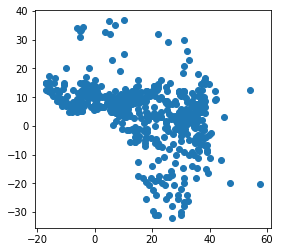

In [25]:
wals[wals['macroarea']=='Africa'].plot()

In [37]:
guardian[guardian['Countries'] == 'Kenya'].drop(columns='geometry').merge(wals[wals['countrycodes'].str.contains('KE')].drop(columns='geometry'),how='outer')

,ID,Name in En,Countries,Country co,iso_code,Degree of,Alternate,Number of,Sources,Latitude,...,137B M in Second Person Singular,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives
0,91,Burji,Kenya,KEN,bji,Vulnerable,None,7000,Ethnologue,2.1857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,99,Boni,Kenya,KEN,bob,Definitely endangered,"Aweera, Waata, Sanye\n\n",3000,Bernd Heine,-0.8294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,95,Bong'om,Kenya,KEN,spy,Definitely endangered,None,1000,None,1.1315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101,Dahalo,Kenya,KEN,dal,Severely endangered,None,400,"Mauro Tosco, Ed Elderkin",-2.2625,...,,,,,,,,,,
4,102,Ongamo,Kenya,KEN,nsg,Critically endangered,Nagza,200,Christoph Winter,-2.932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,98,Omotik,Kenya,KEN,omt,Critically endangered,Laamoot,50,"Franz Rottland, Ethnologue",-1.115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,92,Elmolo,Kenya,KEN,elo,Extinct,None,0,Bernd Heine,2.7212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,137,Kinare,Kenya,KEN,None,Extinct,None,0,Franz Rottland,-0.725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,100,Kore,Kenya,KEN,None,Extinct,None,0,Bernd Heine,-2.2845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,93,Lorkoti,Kenya,KEN,None,Extinct,None,0,Franz Rottland,-0.4943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
kenya_mammalia = pd.read_table('../biodiversity_data/Kenya_Mammalia.csv')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [42]:
kenya_mammalia.isnull().sum()

gbifID                               0
datasetKey                           0
occurrenceID                      5656
kingdom                              0
phylum                               0
class                                0
order                              181
family                             640
genus                             2180
species                           9780
infraspecificEpithet             54337
taxonRank                            0
scientificName                       0
countryCode                          0
locality                          4943
publishingOrgKey                     0
decimalLatitude                      0
decimalLongitude                     0
coordinateUncertaintyInMeters    46797
coordinatePrecision              52988
elevation                        42551
elevationAccuracy                55472
depth                            56712
depthAccuracy                    56712
eventDate                         9282
day                      

In [46]:
kenya_mammalia.drop(columns=['gbifID','datasetKey','occurrenceID',
                             'kingdom','phylum','class','order','family',
                            'infraspecificEpithet','taxonRank','scientificName',
                             'locality','publishingOrgKey','coordinateUncertaintyInMeters',
                             'coordinatePrecision','elevation','elevationAccuracy','depth',
                             'depthAccuracy','eventDate','day','month','speciesKey','basisOfRecord',
                             'institutionCode','collectionCode','catalogNumber','recordNumber',
                             'identifiedBy','dateIdentified','license','rightsHolder','recordedBy',
                             'typeStatus','establishmentMeans','lastInterpreted','mediaType','issue'],
                    inplace=True
                   )

In [49]:
kenya_mammalia_geo = gpd.GeoDataFrame(kenya_mammalia)

In [52]:
kenya_mammalia_geo['geometry'] = 0

In [55]:
kenya_mammalia_geo

,genus,species,countryCode,decimalLatitude,decimalLongitude,year,taxonKey,geometry
0,Cercopithecus,Cercopithecus mitis,KE,-3.303955,40.014855,2008.0,5786268,0
1,Cercopithecus,Cercopithecus mitis,KE,-1.361333,36.785562,2008.0,5786289,0
2,Papio,Papio anubis,KE,-0.546281,36.322449,2016.0,5707341,0
3,Papio,Papio anubis,KE,-0.546281,36.322449,2016.0,5707341,0
4,Papio,Papio anubis,KE,-0.546281,36.322449,2016.0,5707341,0
5,Papio,Papio anubis,KE,-0.546281,36.322449,2016.0,5707341,0
6,Chlorocebus,Chlorocebus pygerythrus,KE,-0.375593,36.095693,2006.0,4267128,0
7,Acinonyx,Acinonyx jubatus,KE,-1.516762,34.996818,2006.0,2435270,0
8,Madoqua,Madoqua kirkii,KE,-0.375593,36.095693,2006.0,2441001,0
9,Connochaetes,Connochaetes taurinus,KE,-1.415182,34.941703,2006.0,2441105,0


In [64]:
geo_array = []
for i in kenya_mammalia_geo.index:
    geo_array.append(tuple((float(kenya_mammalia_geo.decimalLongitude[i]), 
                                               float(kenya_mammalia_geo.decimalLatitude[i]))))

In [66]:
kenya_mammalia_geo['geometry'] = geo_array

In [69]:
kenya_mammalia_geo['geometry'] = kenya_mammalia_geo['geometry'].apply(Point)

In [83]:
kenya.head()

,id,country,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,note,rpath,ISO3166_2,geometry
0,3495537,KEN,Baringo,None,Baringo,None,administrative,4,Q808201,None,2018-10-06 07:05:21,None,"3495537,192798,0",KE-01,"POLYGON ((35.5234935 0.0131824, 35.5242973 0.0..."
1,3338139,KEN,Bomet,None,Bomet,None,administrative,4,Q891952,None,2018-10-06 07:05:21,None,"3338139,192798,0",KE-02,"POLYGON ((35.0129447 -0.8826423, 35.0147147 -0..."
2,3495538,KEN,Bungoma,None,Bungoma,None,administrative,4,Q2928204,None,2018-10-06 07:05:21,None,"3495538,192798,0",KE-03,"POLYGON ((34.3624595 0.7754809, 34.3624954 0.7..."
3,3486321,KEN,Busia,None,Busia,None,administrative,4,Q1017519,None,2018-10-06 07:05:21,None,"3486321,192798,0",KE-04,(POLYGON ((33.91340705609331 0.097341725466683...
4,3495539,KEN,Elegeyo-Marakwet,None,Elegeyo-Marakwet,None,administrative,4,Q15216433,None,2018-10-06 07:05:21,None,"3495539,192798,0",KE-05,"POLYGON ((35.152288 1.1982292, 35.2011161 1.17..."


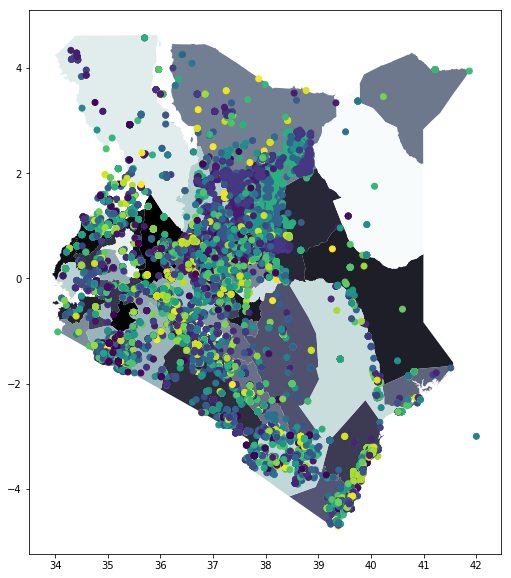

In [85]:
base = kenya.plot(figsize=(10,10), column='name', cmap='bone')
kenya_mammalia_geo.dropna().plot(column='genus',categorical=True,ax=base, cmap='viridis')

In [87]:
guardian2 = gpd.read_file('../language_data/guardian_version2/')